# Comparison of simple linear regression in Pytorch vs Neuromancer

given data $y, x$ estimate $W, b$ in $\, y = Wx + b$


### Install (Colab only)
Skip this step when running locally.

In [ ]:
!pip install git+https://github.com/pnnl/neuromancer.git@master

### Import

In [1]:
from neuromancer.constraint import variable
import torch
import torch.nn.functional as F

### Data

In [2]:
# randomly generate the problem data
torch.manual_seed(0)
x_true = torch.arange(0.0, 1.0 + 0.1, 0.1)
w_true = torch.tensor(0.5)
b_true = torch.tensor(1.0)
y_true = x_true * w_true + b_true

### Pure Pytorch regression model

In [7]:
# randomly initialize parameters
torch.manual_seed(0)
w_1 = torch.randn(1, requires_grad=True)
b_1 = torch.randn(1, requires_grad=True)

# training
opt = torch.optim.Adam([w_1, b_1])  # parameters of tensor model
epochs = 10000
losses = []
for i in range(epochs):
    opt.zero_grad()
    y_torch = x_true * w_1 + b_1
    loss = F.mse_loss(y_torch, y_true)
    losses.append(loss.item())
    loss.backward(retain_graph=True)
    opt.step()

print(f"w estimated to {w_1} true value is {w_true}")
print(f"b estimated to {b_1} true value is {b_true}")

w estimated to tensor([0.5000], requires_grad=True) true value is 0.5
b estimated to tensor([1.0000], requires_grad=True) true value is 1.0


### Neuromancer variable model

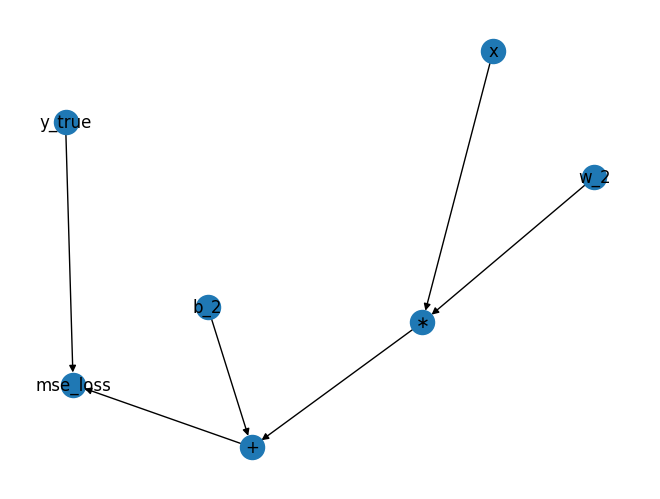

In [4]:
# randomly initialize parameters
torch.manual_seed(0)
w_2 = torch.randn(1, requires_grad=True)
b_2 = torch.randn(1, requires_grad=True)

# create symbolic representation of the problem using Neuromancer variable
var_x = variable("x")
var_w = variable(w_2,  display_name='w_2')
var_b = variable(b_2,  display_name='b_2')
var_y_est = var_x * var_w + var_b
var_y_true = variable(y_true,  display_name='y_true')
var_loss = F.mse_loss(var_y_est, var_y_true)
# show computational graph of the loss function variable
var_loss.show()

In [5]:
# training
opt_var = torch.optim.Adam(var_loss.parameters())  # parameters of variable model
losses = []
for i in range(epochs):
    opt_var.zero_grad()
    loss = var_loss({'x': x_true})
    losses.append(loss.item())
    loss.backward(retain_graph=True)
    opt_var.step()

print(f"w estimated to {w_2} true value is {w_true}")
print(f"b estimated to {b_2} true value is {b_true}")

w estimated to tensor([0.5000], requires_grad=True) true value is 0.5
b estimated to tensor([1.0000], requires_grad=True) true value is 1.0
